In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
# plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

# Financial Data and Preprocessing 

## Getting data from Yahoo Finance

1. Import the libraries:

In [4]:
import pandas as pd 
import yfinance as yf

2. Download the data:

In [7]:
'''df_yahoo = yf.download('AAPL', 
                       start='2000-01-01', 
                       end='2010-12-31',
                       progress=False)'''



df_yahoo = yf.download('AAPL', 
                       start='2000-01-01', 
                       end='2020-11-20',
                       progress=False)

3. Inspect the data:

In [10]:
print(f'Downloaded {df_yahoo.shape[0]} rows of data.')

df_yahoo.head()

Downloaded 5256 rows of data.


Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2000-01-03  0.936384  1.004464  0.907924  0.999442   0.855168  535796800
2000-01-04  0.966518  0.987723  0.903460  0.915179   0.783068  512377600
2000-01-05  0.926339  0.987165  0.919643  0.928571   0.794528  778321600
2000-01-06  0.947545  0.955357  0.848214  0.848214   0.725771  767972800
2000-01-07  0.861607  0.901786  0.852679  0.888393   0.760149  460734400

## Getting data from Quandl 

1. Import the libraries:

In [11]:
import pandas as pd 
import quandl

2. Authenticate using the personal API key:

In [14]:
QUANDL_KEY = 'fcvvaXByQCo_3E2c4cjK' # replace {key} with your own API key  
quandl.ApiConfig.api_key = QUANDL_KEY

3. Download the data:

In [16]:
df_quandl = quandl.get(dataset='WIKI/AAPL',
                       start_date='2000-01-01', 
                       end_date='2010-12-31')

4. Inspect the data:

In [17]:
print(f'Downloaded {df_quandl.shape[0]} rows of data.')

df_quandl.head()

Downloaded 2767 rows of data.


Open    High     Low   Close     Volume  Ex-Dividend  \
Date                                                                 
2000-01-03  104.87  112.50  101.69  111.94  4783900.0          0.0   
2000-01-04  108.25  110.62  101.19  102.50  4574800.0          0.0   
2000-01-05  103.75  110.56  103.00  104.00  6949300.0          0.0   
2000-01-06  106.12  107.00   95.00   95.00  6856900.0          0.0   
2000-01-07   96.50  101.00   95.50   99.50  4113700.0          0.0   

            Split Ratio  Adj. Open  Adj. High  Adj. Low  Adj. Close  \
Date                                                                  
2000-01-03          1.0   3.369314   3.614454  3.267146    3.596463   
2000-01-04          1.0   3.477908   3.554053  3.251081    3.293170   
2000-01-05          1.0   3.333330   3.552125  3.309234    3.341362   
2000-01-06          1.0   3.409475   3.437748  3.052206    3.052206   
2000-01-07          1.0   3.100399   3.244977  3.068270    3.196784   

            Adj. Volume  
Date                     
2000-01-03  133949200.0  
2000-01-04  128094400.0  
2000-01-05  194580400.0  
2000-01-06  191993200.0  
2000-01-07  115183600.0

## Getting data from Intrinio

1. Import the libraries:

In [18]:
import intrinio_sdk
import pandas as pd

2. Authenticate using the personal API key and select the API:

In [19]:
intrinio_sdk.ApiClient().configuration.api_key['api_key'] = '{key}'  # replace {key} with your own API key  
security_api = intrinio_sdk.SecurityApi()

3. Request the data:

In [20]:
r = security_api.get_security_stock_prices(identifier='AAPL', 
                                           start_date='2000-01-01',
                                           end_date='2010-12-31', 
                                           frequency='daily',
                                           page_size=10000)

ApiException: (401)
Reason: Unauthorized
HTTP response headers: HTTPHeaderDict({'Date': 'Fri, 27 Nov 2020 05:24:48 GMT', 'Content-Type': 'application/json', 'Content-Length': '77', 'Connection': 'keep-alive', 'Vary': 'Origin,Accept-Encoding'})
HTTP response body: {"error":"API Key was invalid.","message":"API Key was formatted invalidly."}


4. Convert the results into a DataFrame:

In [21]:
response_list = [x.to_dict() for x in r.stock_prices]
df_intrinio = pd.DataFrame(response_list).sort_values('date')
df_intrinio.set_index('date', inplace=True)

NameError: name 'r' is not defined

5. Inspect the data:

In [22]:
print(f'Downloaded {df_intrinio.shape[0]} rows of data.')

df_intrinio.head()

NameError: name 'df_intrinio' is not defined

## Converting prices to returns

### How to do it...

1. Import the libraries:

In [23]:
import pandas as pd 
import numpy as np
import yfinance as yf

2. Download the data and keep the adjusted close prices only:

In [24]:
df = yf.download('AAPL', 
                 start='2000-01-01', 
                 end='2010-12-31',
                 progress=False)

df = df.loc[:, ['Adj Close']]
df.rename(columns={'Adj Close':'adj_close'}, inplace=True)

3. Convert adjusted close prices to simple and log returns:

In [25]:
df['simple_rtn'] = df.adj_close.pct_change()
df['log_rtn'] = np.log(df.adj_close/df.adj_close.shift(1))

4. Inspect the output:

In [26]:
df.head()

adj_close  simple_rtn   log_rtn
Date                                       
2000-01-03   0.855168         NaN       NaN
2000-01-04   0.783068   -0.084310 -0.088078
2000-01-05   0.794528    0.014634  0.014528
2000-01-06   0.725771   -0.086538 -0.090514
2000-01-07   0.760149    0.047369  0.046281

### There's more

1. Import libraries and authenticate:

In [28]:
import pandas as pd
import quandl

QUANDL_KEY = 'fcvvaXByQCo_3E2c4cjK' # replace {key} with your own API key  
quandl.ApiConfig.api_key = QUANDL_KEY

2. Create a DataFrame with all possible dates and left join the prices on it:

In [29]:
df_all_dates = pd.DataFrame(index=pd.date_range(start='1999-12-31', 
                                                end='2010-12-31'))
df = df_all_dates.join(df[['adj_close']], how='left') \
                 .fillna(method='ffill') \
                 .asfreq('M')

3. Download inflation data from Quandl:

In [30]:
df_cpi = quandl.get(dataset='RATEINF/CPI_USA', 
                    start_date='1999-12-01', 
                    end_date='2010-12-31')
df_cpi.rename(columns={'Value':'cpi'}, inplace=True)

4. Merge inflation data to prices:

In [31]:
df_merged = df.join(df_cpi, how='left')

5. Calculate simple returns and inflation rate:

In [32]:
df_merged['simple_rtn'] = df_merged.adj_close.pct_change()
df_merged['inflation_rate'] = df_merged.cpi.pct_change()

6. Adjust returns for inflation:

In [33]:
df_merged['real_rtn'] = (df_merged.simple_rtn + 1) / (df_merged.inflation_rate + 1) - 1
df_merged.head()

adj_close    cpi  simple_rtn  inflation_rate  real_rtn
1999-12-31        NaN  168.3         NaN             NaN       NaN
2000-01-31   0.792618  168.8         NaN        0.002971       NaN
2000-02-29   0.875700  169.8    0.104819        0.005924  0.098313
2000-03-31   1.037565  171.2    0.184842        0.008245  0.175152
2000-04-30   0.947799  171.3   -0.086516        0.000584 -0.087049

## Changing frequency

0. Obtain the simple returns in case of starting in this recipe:

In [34]:
import pandas as pd 
import yfinance as yf

# download data 
df = yf.download('AAPL', 
                 start='2000-01-01', 
                 end='2010-12-31', 
                 auto_adjust=False,
                 progress=False)

# keep only the adjusted close price
df = df.loc[:, ['Adj Close']]
df.rename(columns={'Adj Close': 'adj_close'}, inplace=True)

# calculate simple returns
df['log_rtn'] = np.log(df.adj_close/df.adj_close.shift(1))

# remove redundant data
df.drop('adj_close', axis=1, inplace=True)
df.dropna(axis=0, inplace=True)

df.head()

log_rtn
Date                
2000-01-04 -0.088078
2000-01-05  0.014528
2000-01-06 -0.090514
2000-01-07  0.046281
2000-01-10 -0.017745

1. Import the libraries:

In [35]:
import pandas as pd 

2. Define the function for calculating the realized volatility:

In [36]:
def realized_volatility(x):
    return np.sqrt(np.sum(x**2))

3. Calculate monthly realized volatility:

In [37]:
df_rv = df.groupby(pd.Grouper(freq='M')).apply(realized_volatility)
df_rv.rename(columns={'log_rtn': 'rv'}, inplace=True)

4. Annualize the values:

In [38]:
df_rv.rv = df_rv.rv * np.sqrt(12)

5. Plot the results:

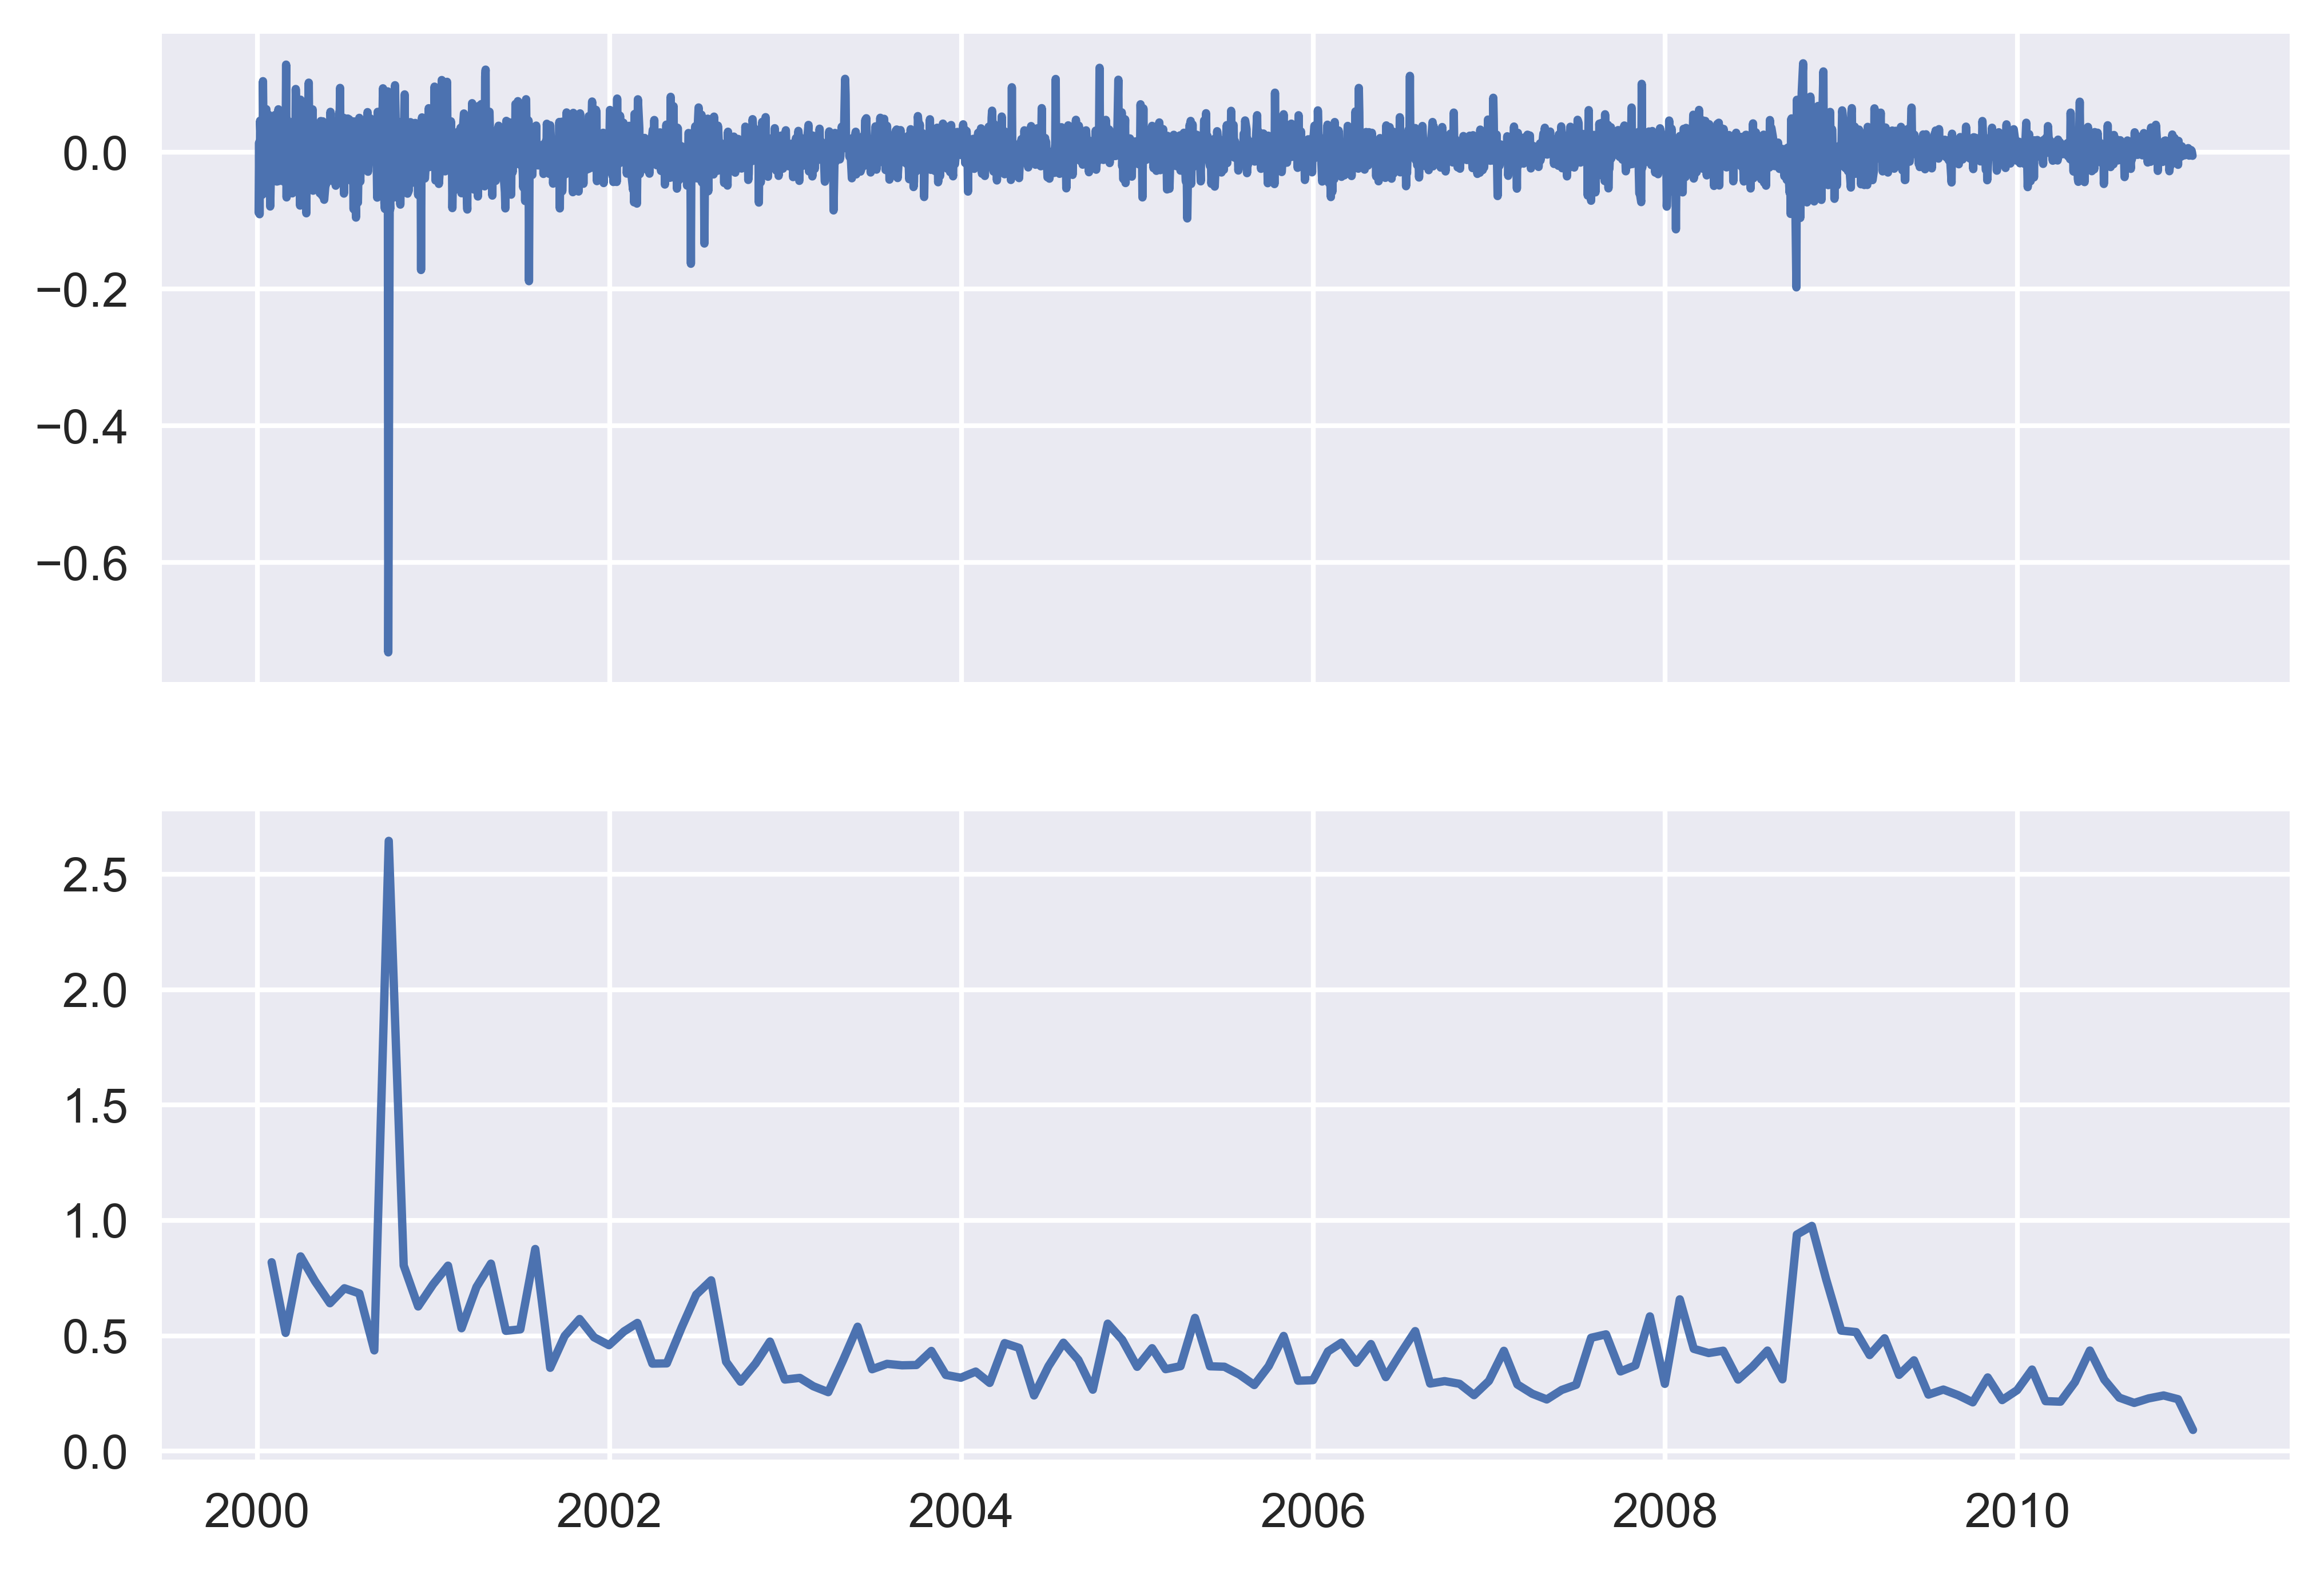

In [40]:
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(df)
ax[1].plot(df_rv)

# plt.tight_layout()
# plt.savefig('images/ch1_im6.png')
plt.show()

## Visualizing time series data

### Getting ready

In [41]:
import pandas as pd 
import yfinance as yf

# download data as pandas DataFrame
df = yf.download('MSFT', auto_adjust = False, progress=False)
df = df.loc[:, ['Adj Close']]
df.rename(columns={'Adj Close': 'adj_close'}, inplace=True)

# create simple and log returns
df['simple_rtn'] = df.adj_close.pct_change()
df['log_rtn'] = np.log(df.adj_close / df.adj_close.shift(1))

# dropping NA's in the first row
df.dropna(how = 'any', inplace = True)

### How to do it...

#### the `plot` method of pandas

/Users/ahmedfadhluddin/.pyenv/versions/3.8.3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
/Users/ahmedfadhluddin/.pyenv/versions/3.8.3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
/Users/ahmedfadhluddin/.pyenv/versions/3.8.3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


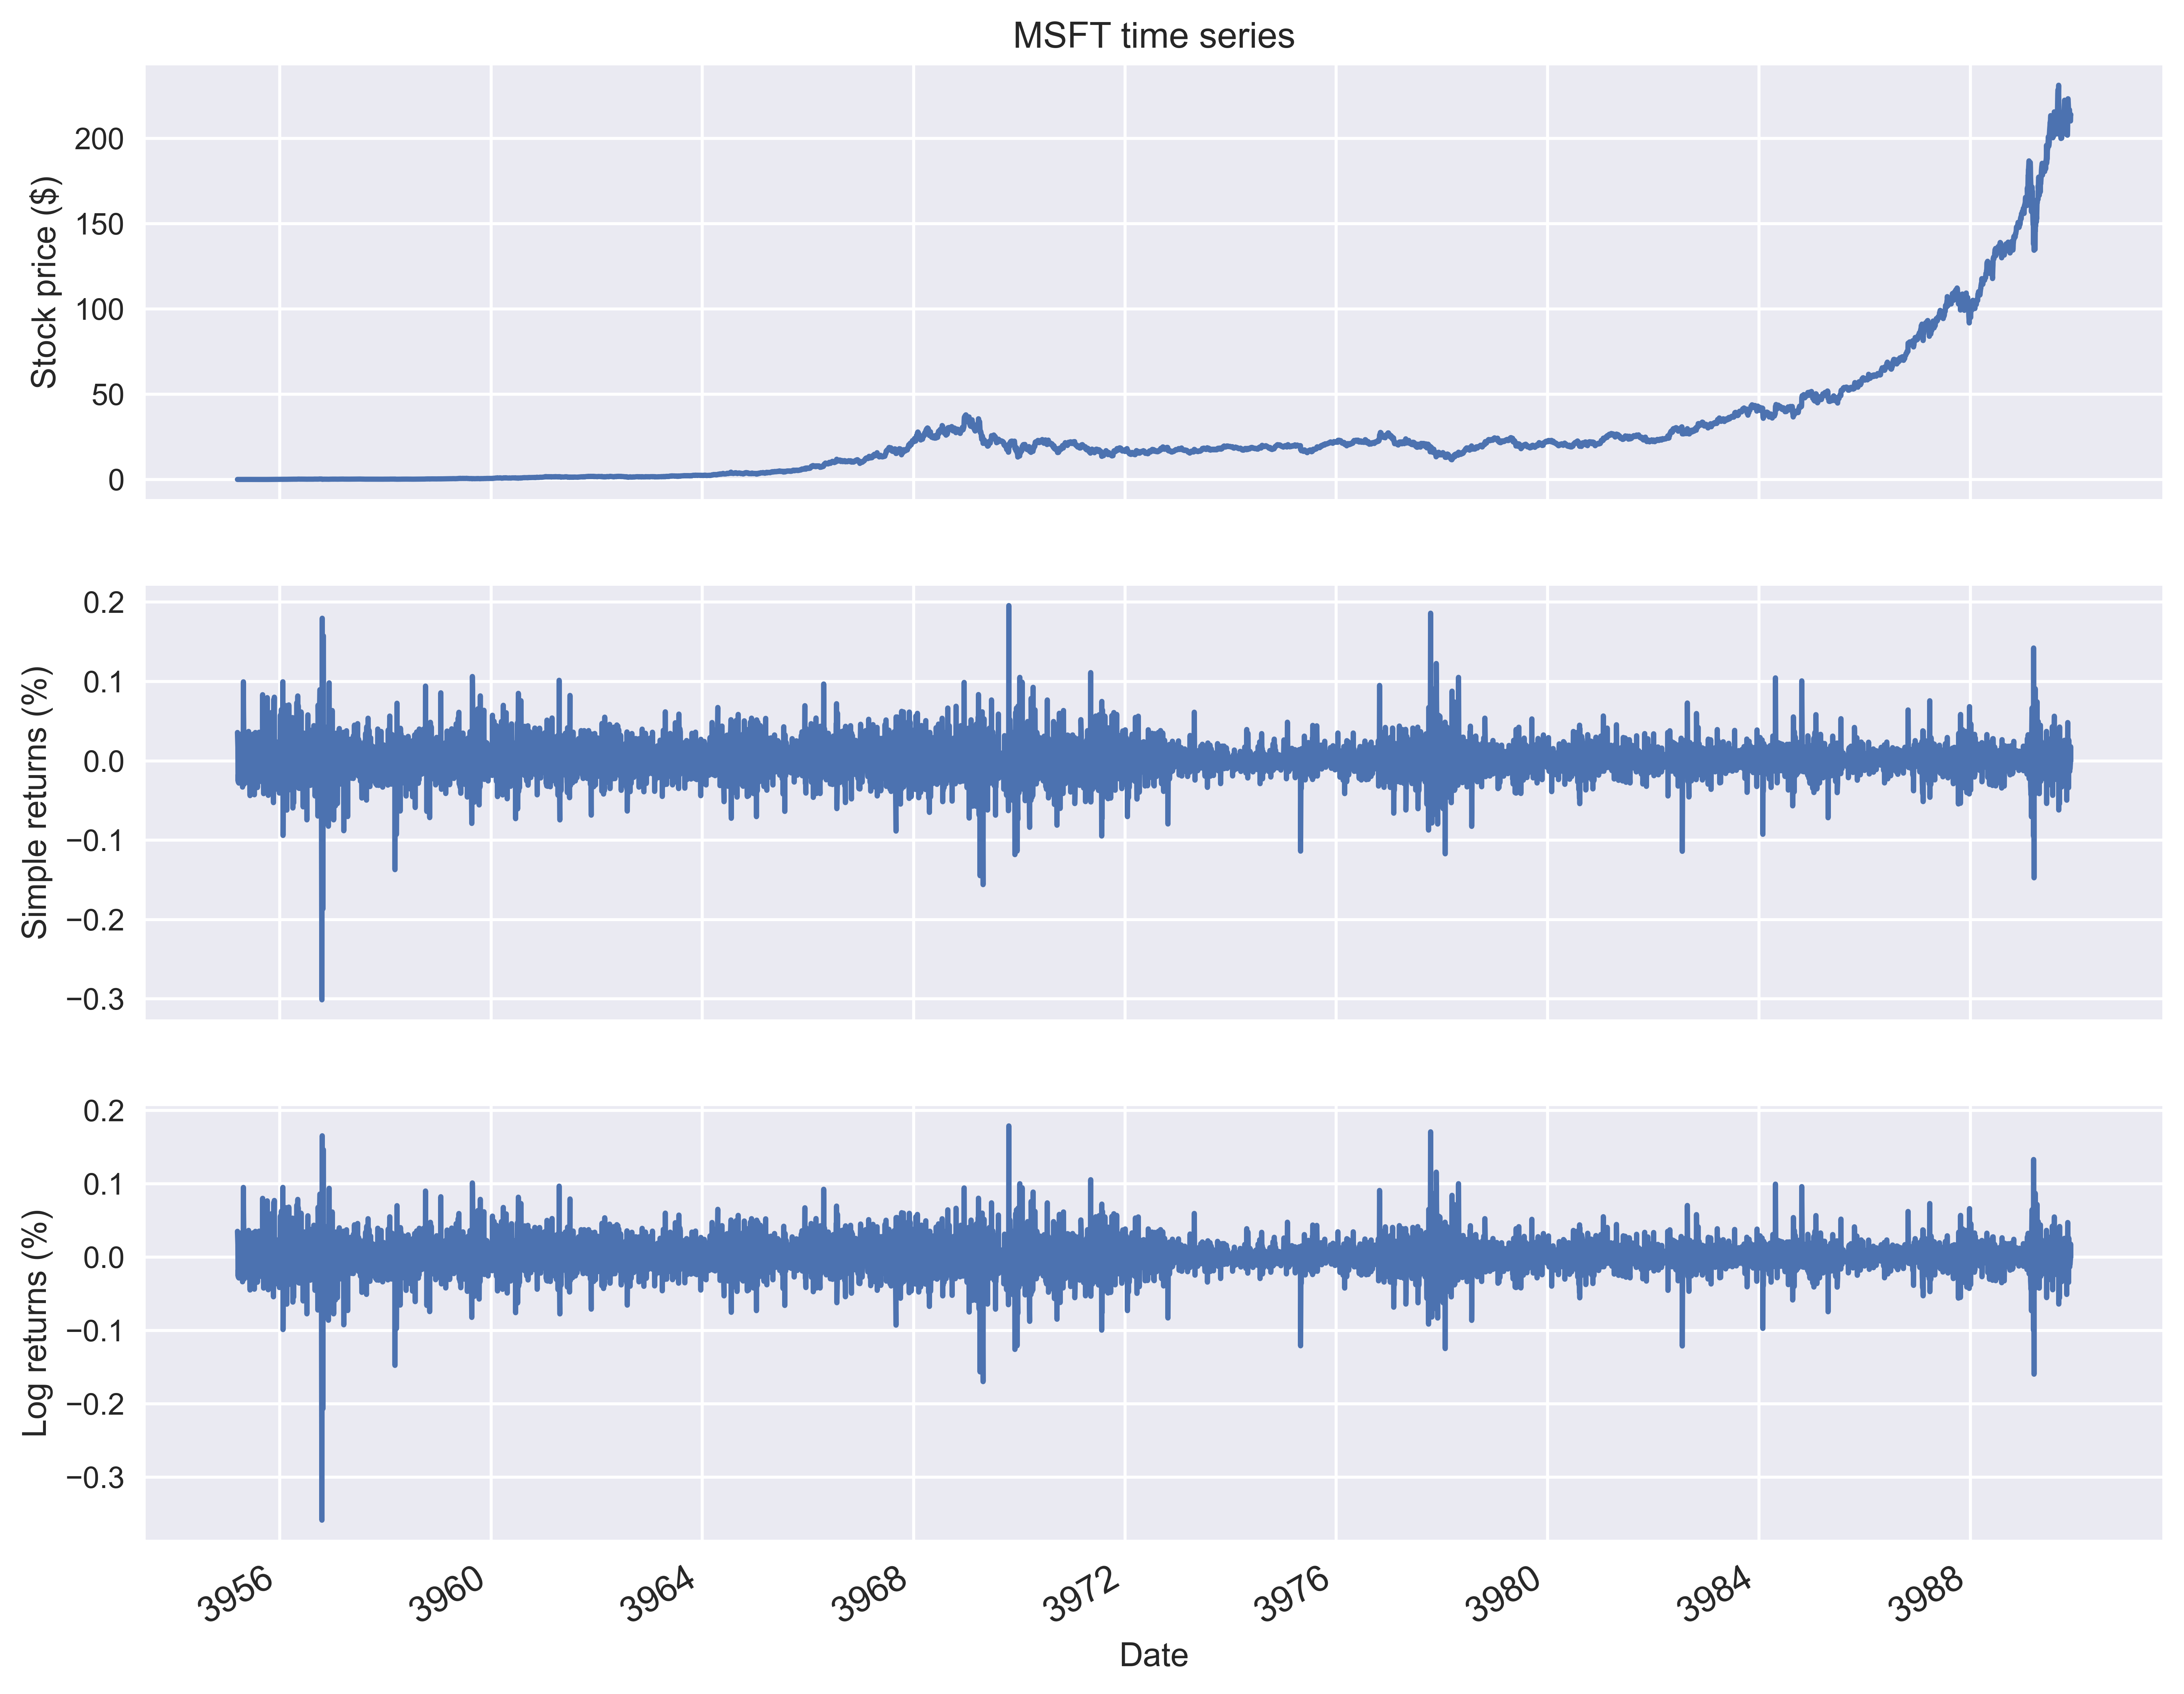

In [42]:
fig, ax = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# add prices
df.adj_close.plot(ax=ax[0])
ax[0].set(title = 'MSFT time series',
          ylabel = 'Stock price ($)')
    
# add simple returns 
df.simple_rtn.plot(ax=ax[1])
ax[1].set(ylabel = 'Simple returns (%)')

# add log returns 
df.log_rtn.plot(ax=ax[2])
ax[2].set(xlabel = 'Date', 
          ylabel = 'Log returns (%)')

ax[2].tick_params(axis='x', 
                  which='major', 
                  labelsize=12)

# plt.tight_layout()
# plt.savefig('images/ch1_im7.png')
plt.show()

#### `plotly` + `cufflinks`

1. Import the libraries and handle the settings:

In [ ]:
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode

# set up settings (run it once)
# cf.set_config_file(world_readable=True, theme='pearl', 
#                    offline=True)

# initialize notebook display
init_notebook_mode()

2. Create the plots:

In [ ]:
df.iplot(subplots=True, shape=(3,1), shared_xaxes=True, title='MSFT time series')

## Identifying outliers

0: Repeat the steps from recipe *Converting prices to returns*:

In [3]:
import pandas as pd 
import yfinance as yf

In [4]:
df = yf.download('AAPL', 
                 start='2000-01-01', 
                 end='2010-12-31',
                 progress=False)

df = df.loc[:, ['Adj Close']]
df.rename(columns={'Adj Close':'adj_close'}, inplace=True)

In [5]:
df['simple_rtn'] = df.adj_close.pct_change()

In [6]:
df.head()

adj_close  simple_rtn
Date                             
1999-12-31   3.194901         NaN
2000-01-03   3.478462    0.088754
2000-01-04   3.185191   -0.084311
2000-01-05   3.231803    0.014634
2000-01-06   2.952128   -0.086538

1. Calculate the rolling mean and standard deviation:

In [7]:
df_rolling = df[['simple_rtn']].rolling(window=21) \
                               .agg(['mean', 'std'])
df_rolling.columns = df_rolling.columns.droplevel()

2. Join the rolling metrics to the original data:

In [8]:
df_outliers = df.join(df_rolling)

3. Define a function for detecting outliers:

In [9]:
def indentify_outliers(row, n_sigmas=3):
    '''
    Function for identifying the outliers using the 3 sigma rule. 
    The row must contain the following columns/indices: simple_rtn, mean, std.
    
    Parameters
    ----------
    row : pd.Series
        A row of a pd.DataFrame, over which the function can be applied.
    n_sigmas : int
        The number of standard deviations above/below the mean - used for detecting outliers
        
    Returns
    -------
    0/1 : int
        An integer with 1 indicating an outlier and 0 otherwise.
    '''
    x = row['simple_rtn']
    mu = row['mean']
    sigma = row['std']
    
    if (x > mu + 3 * sigma) | (x < mu - 3 * sigma):
        return 1
    else:
        return 0 

4. Identify the outliers and extract their values for later use:

In [10]:
df_outliers['outlier'] = df_outliers.apply(indentify_outliers, 
                                           axis=1)
outliers = df_outliers.loc[df_outliers['outlier'] == 1, 
                           ['simple_rtn']]

5. Plot the results: 

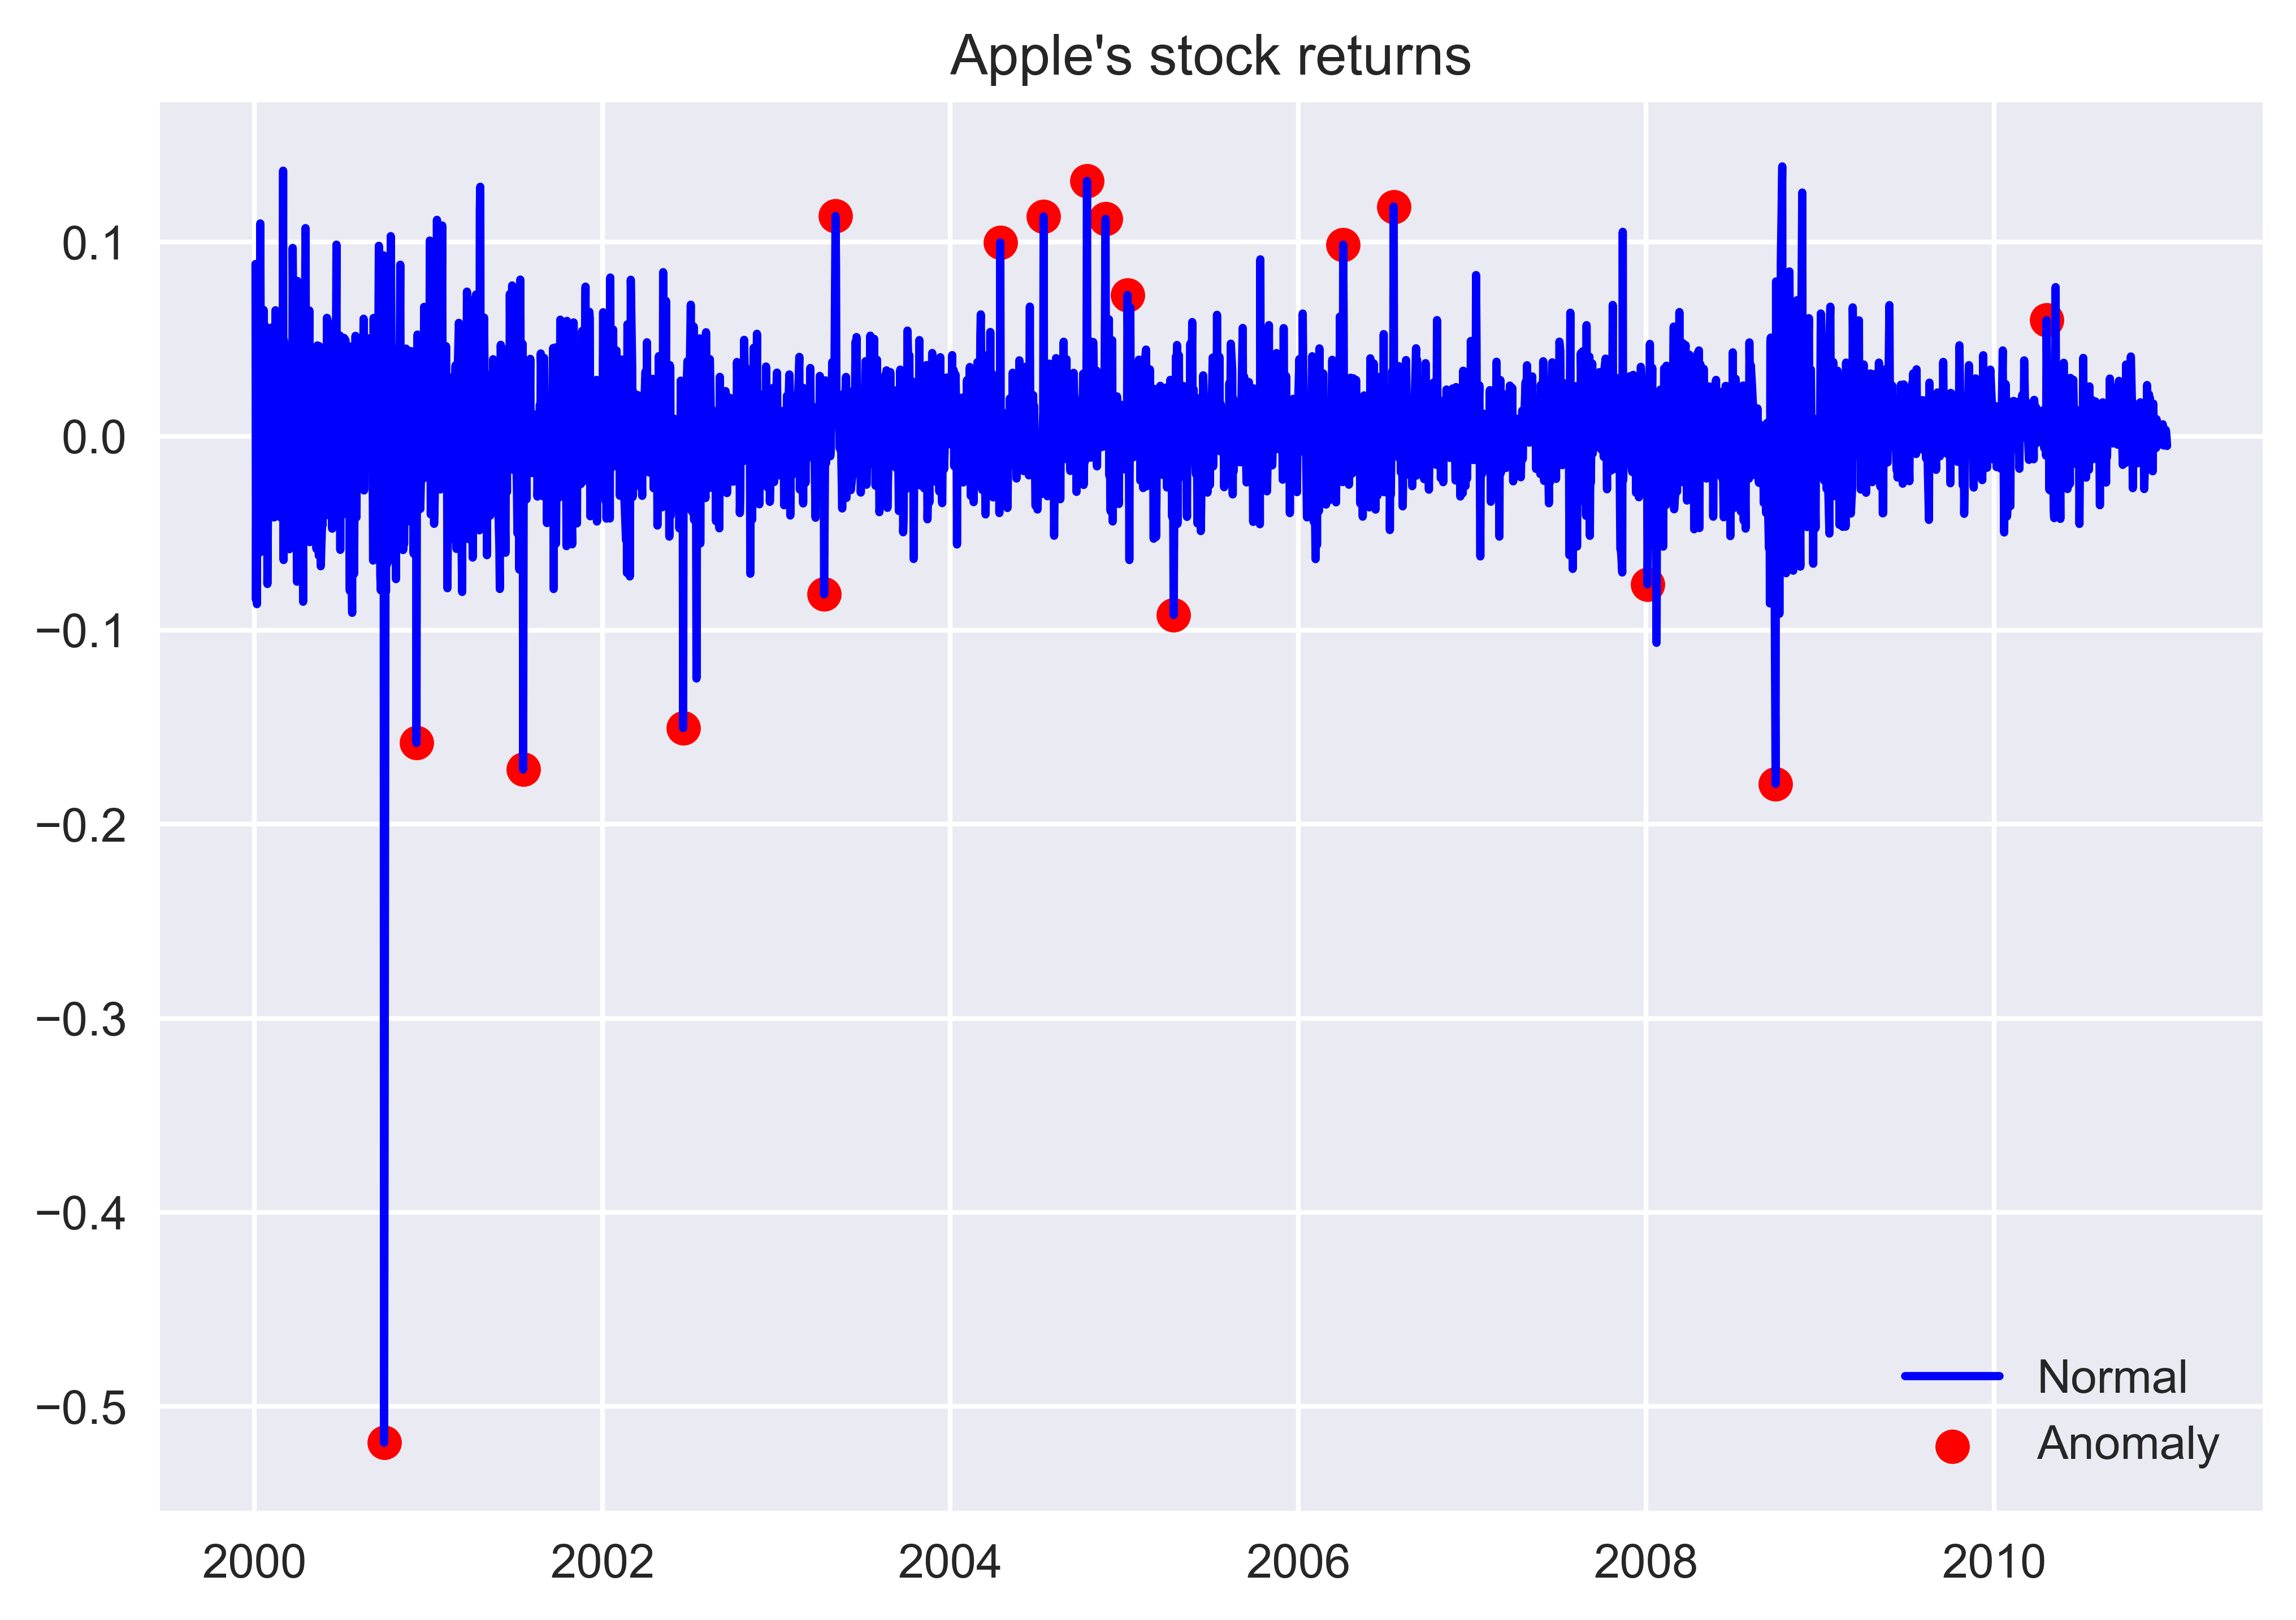

In [11]:
fig, ax = plt.subplots()

ax.plot(df_outliers.index, df_outliers.simple_rtn, 
        color='blue', label='Normal')
ax.scatter(outliers.index, outliers.simple_rtn, 
           color='red', label='Anomaly')
ax.set_title("Apple's stock returns")
ax.legend(loc='lower right')

# plt.tight_layout()
# plt.savefig('images/ch1_im9.png')
plt.show()

## Investigating stylized facts of asset returns

### How to do it...

1. Import the libraries:

In [13]:
import pandas as pd 
import numpy as np
import yfinance as yf
import seaborn as sns 
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.tsa.api as smt

2. Download the S&P 500 data and calculate the returns:

In [14]:
df = yf.download('^GSPC', 
                 start='1985-01-01', 
                 end='2018-12-31',
                 progress=False)

df = df[['Adj Close']].rename(columns={'Adj Close': 'adj_close'})
df['log_rtn'] = np.log(df.adj_close/df.adj_close.shift(1))
df = df[['adj_close', 'log_rtn']].dropna(how = 'any')

#### Fact 1 - Non-Gaussian distribution of returns

1. Calculate the Normal PDF using the mean and standard deviation of the observed returns:

In [15]:
r_range = np.linspace(min(df.log_rtn), max(df.log_rtn), num=1000)
mu = df.log_rtn.mean()
sigma = df.log_rtn.std()
norm_pdf = scs.norm.pdf(r_range, loc=mu, scale=sigma)   

2. Plot the histogram and the Q-Q Plot:

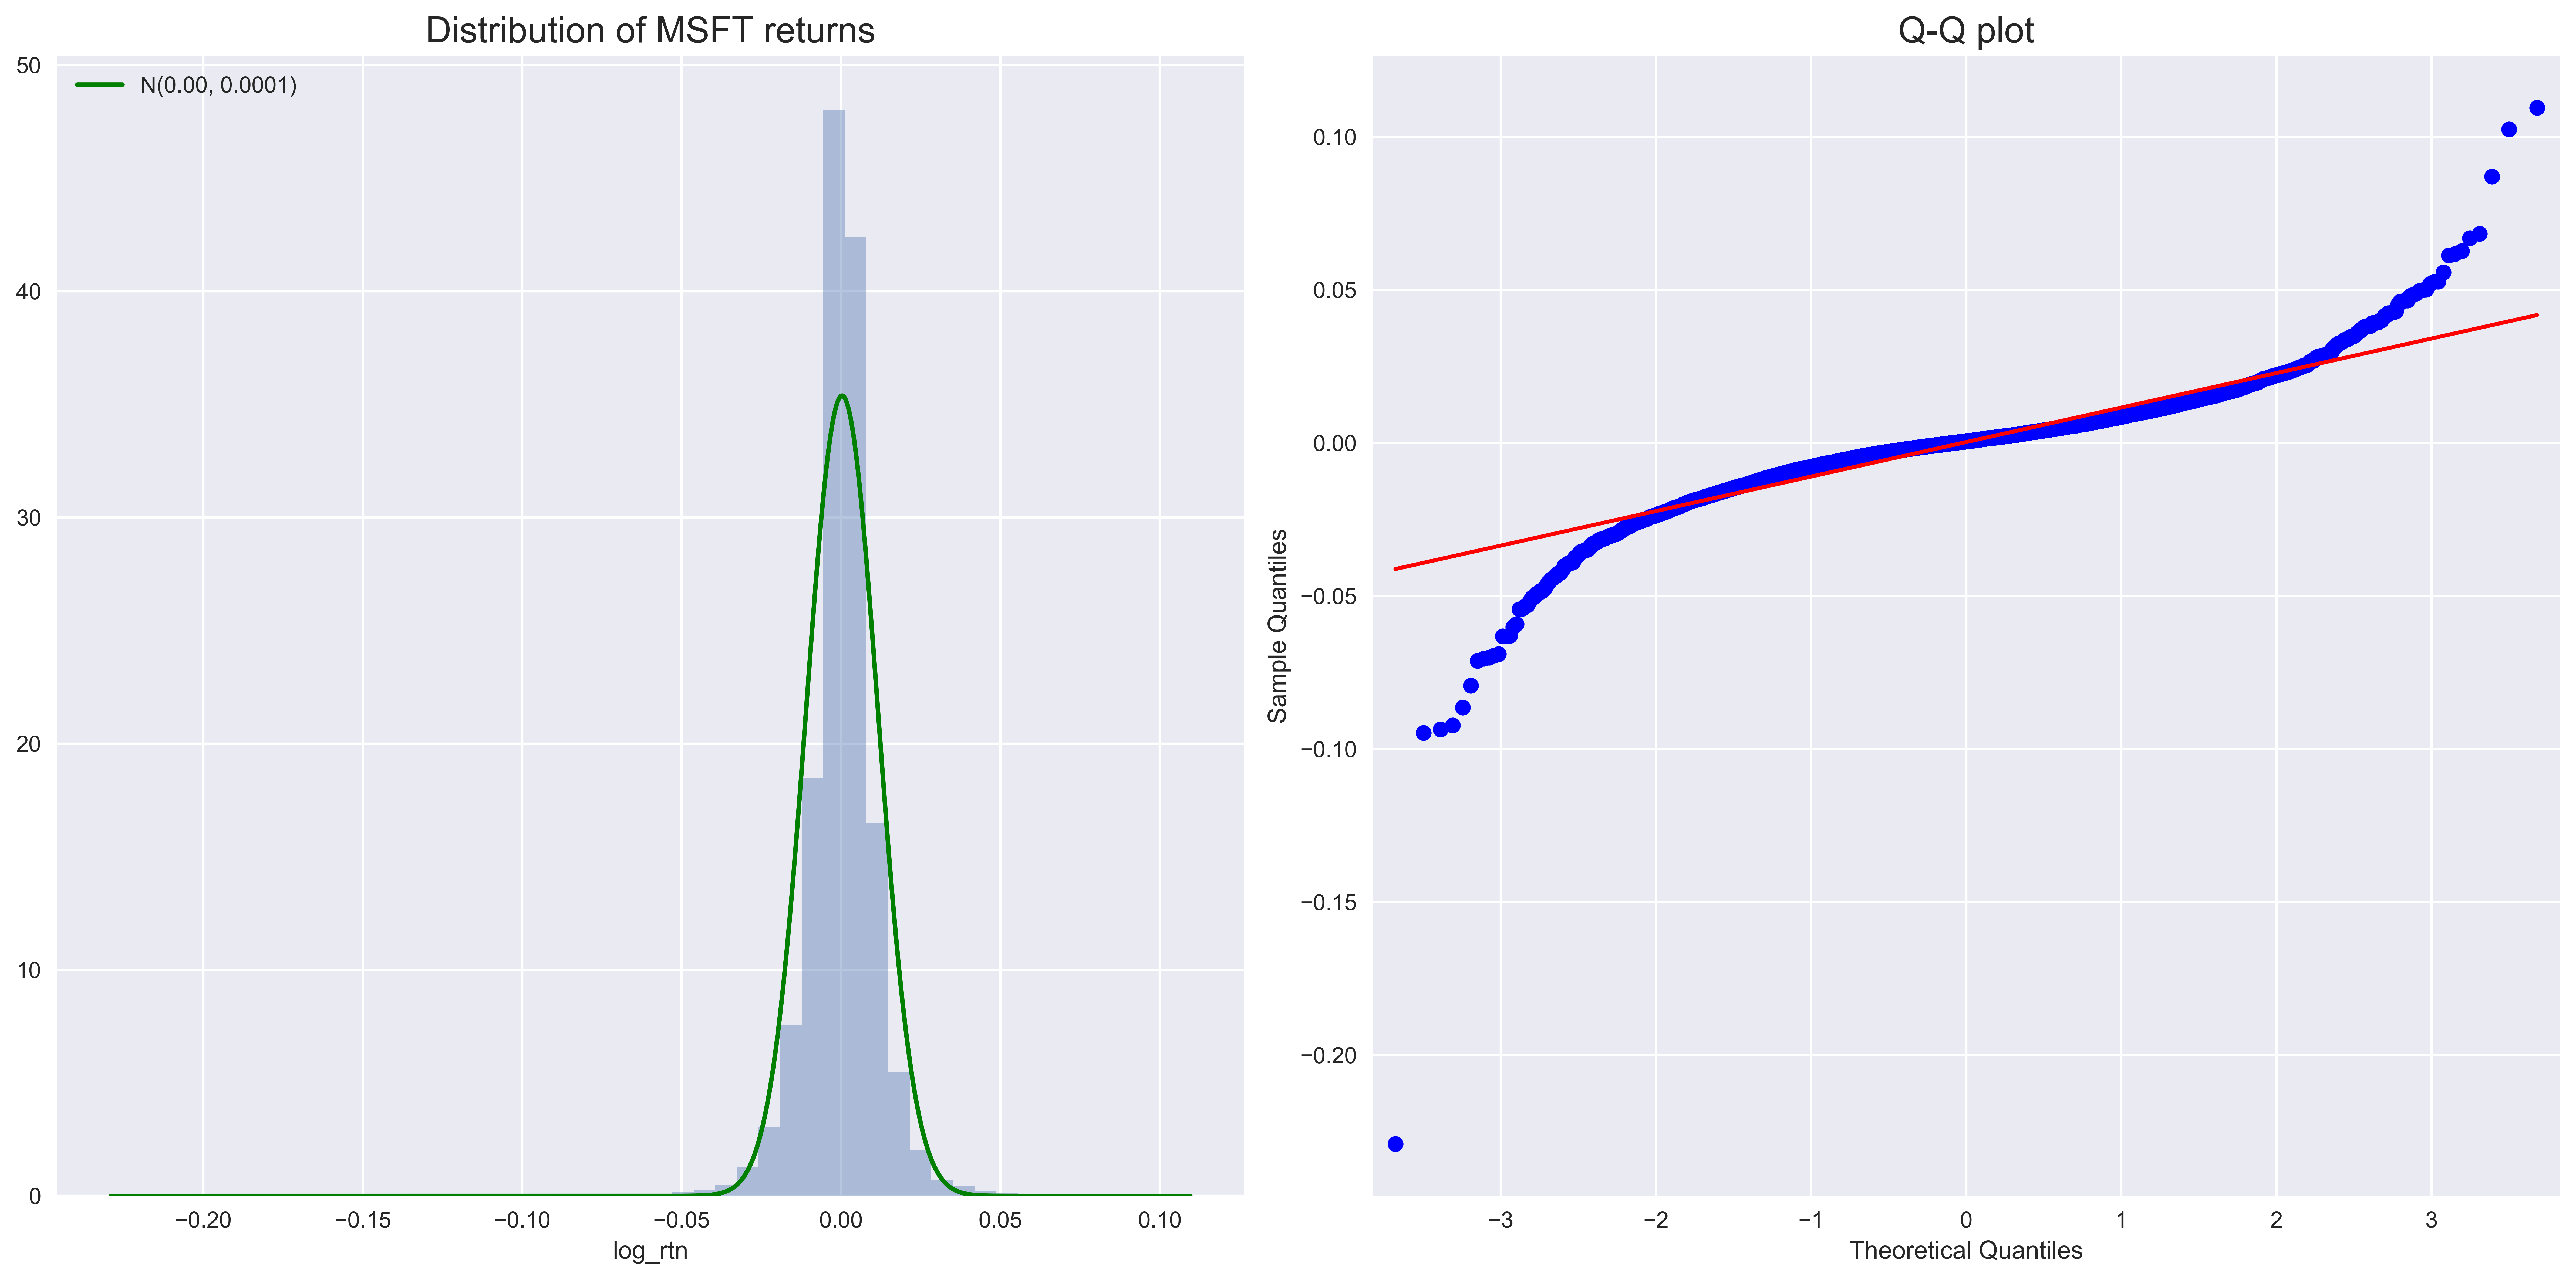

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# histogram
sns.distplot(df.log_rtn, kde=False, norm_hist=True, ax=ax[0])                                    
ax[0].set_title('Distribution of MSFT returns', fontsize=16)                                                    
ax[0].plot(r_range, norm_pdf, 'g', lw=2, 
           label=f'N({mu:.2f}, {sigma**2:.4f})')
ax[0].legend(loc='upper left');

# Q-Q plot
qq = sm.qqplot(df.log_rtn.values, line='s', ax=ax[1])
ax[1].set_title('Q-Q plot', fontsize = 16)

# plt.tight_layout()
# plt.savefig('images/ch1_im10.png')
plt.show()

3. Print the summary statistics of the log returns:

In [66]:
jb_test = scs.jarque_bera(df.log_rtn.values)

print('---------- Descriptive Statistics ----------')
print('Range of dates:', min(df.index.date), '-', max(df.index.date))
print('Number of observations:', df.shape[0])
print(f'Mean: {df.log_rtn.mean():.4f}')
print(f'Median: {df.log_rtn.median():.4f}')
print(f'Min: {df.log_rtn.min():.4f}')
print(f'Max: {df.log_rtn.max():.4f}')
print(f'Standard Deviation: {df.log_rtn.std():.4f}')
print(f'Skewness: {df.log_rtn.skew():.4f}')
print(f'Kurtosis: {df.log_rtn.kurtosis():.4f}') 
print(f'Jarque-Bera statistic: {jb_test[0]:.2f} with p-value: {jb_test[1]:.2f}')

---------- Descriptive Statistics ----------
Range of dates: 1985-01-02 - 2018-12-28
Number of observations: 8569
Mean: 0.0003
Median: 0.0006
Min: -0.2290
Max: 0.1096
Standard Deviation: 0.0113
Skewness: -1.2624
Kurtosis: 28.0111
Jarque-Bera statistic: 282076.61 with p-value: 0.00


#### Fact 2 - Volatility Clustering

1. Run the following code to visualize the log returns series:

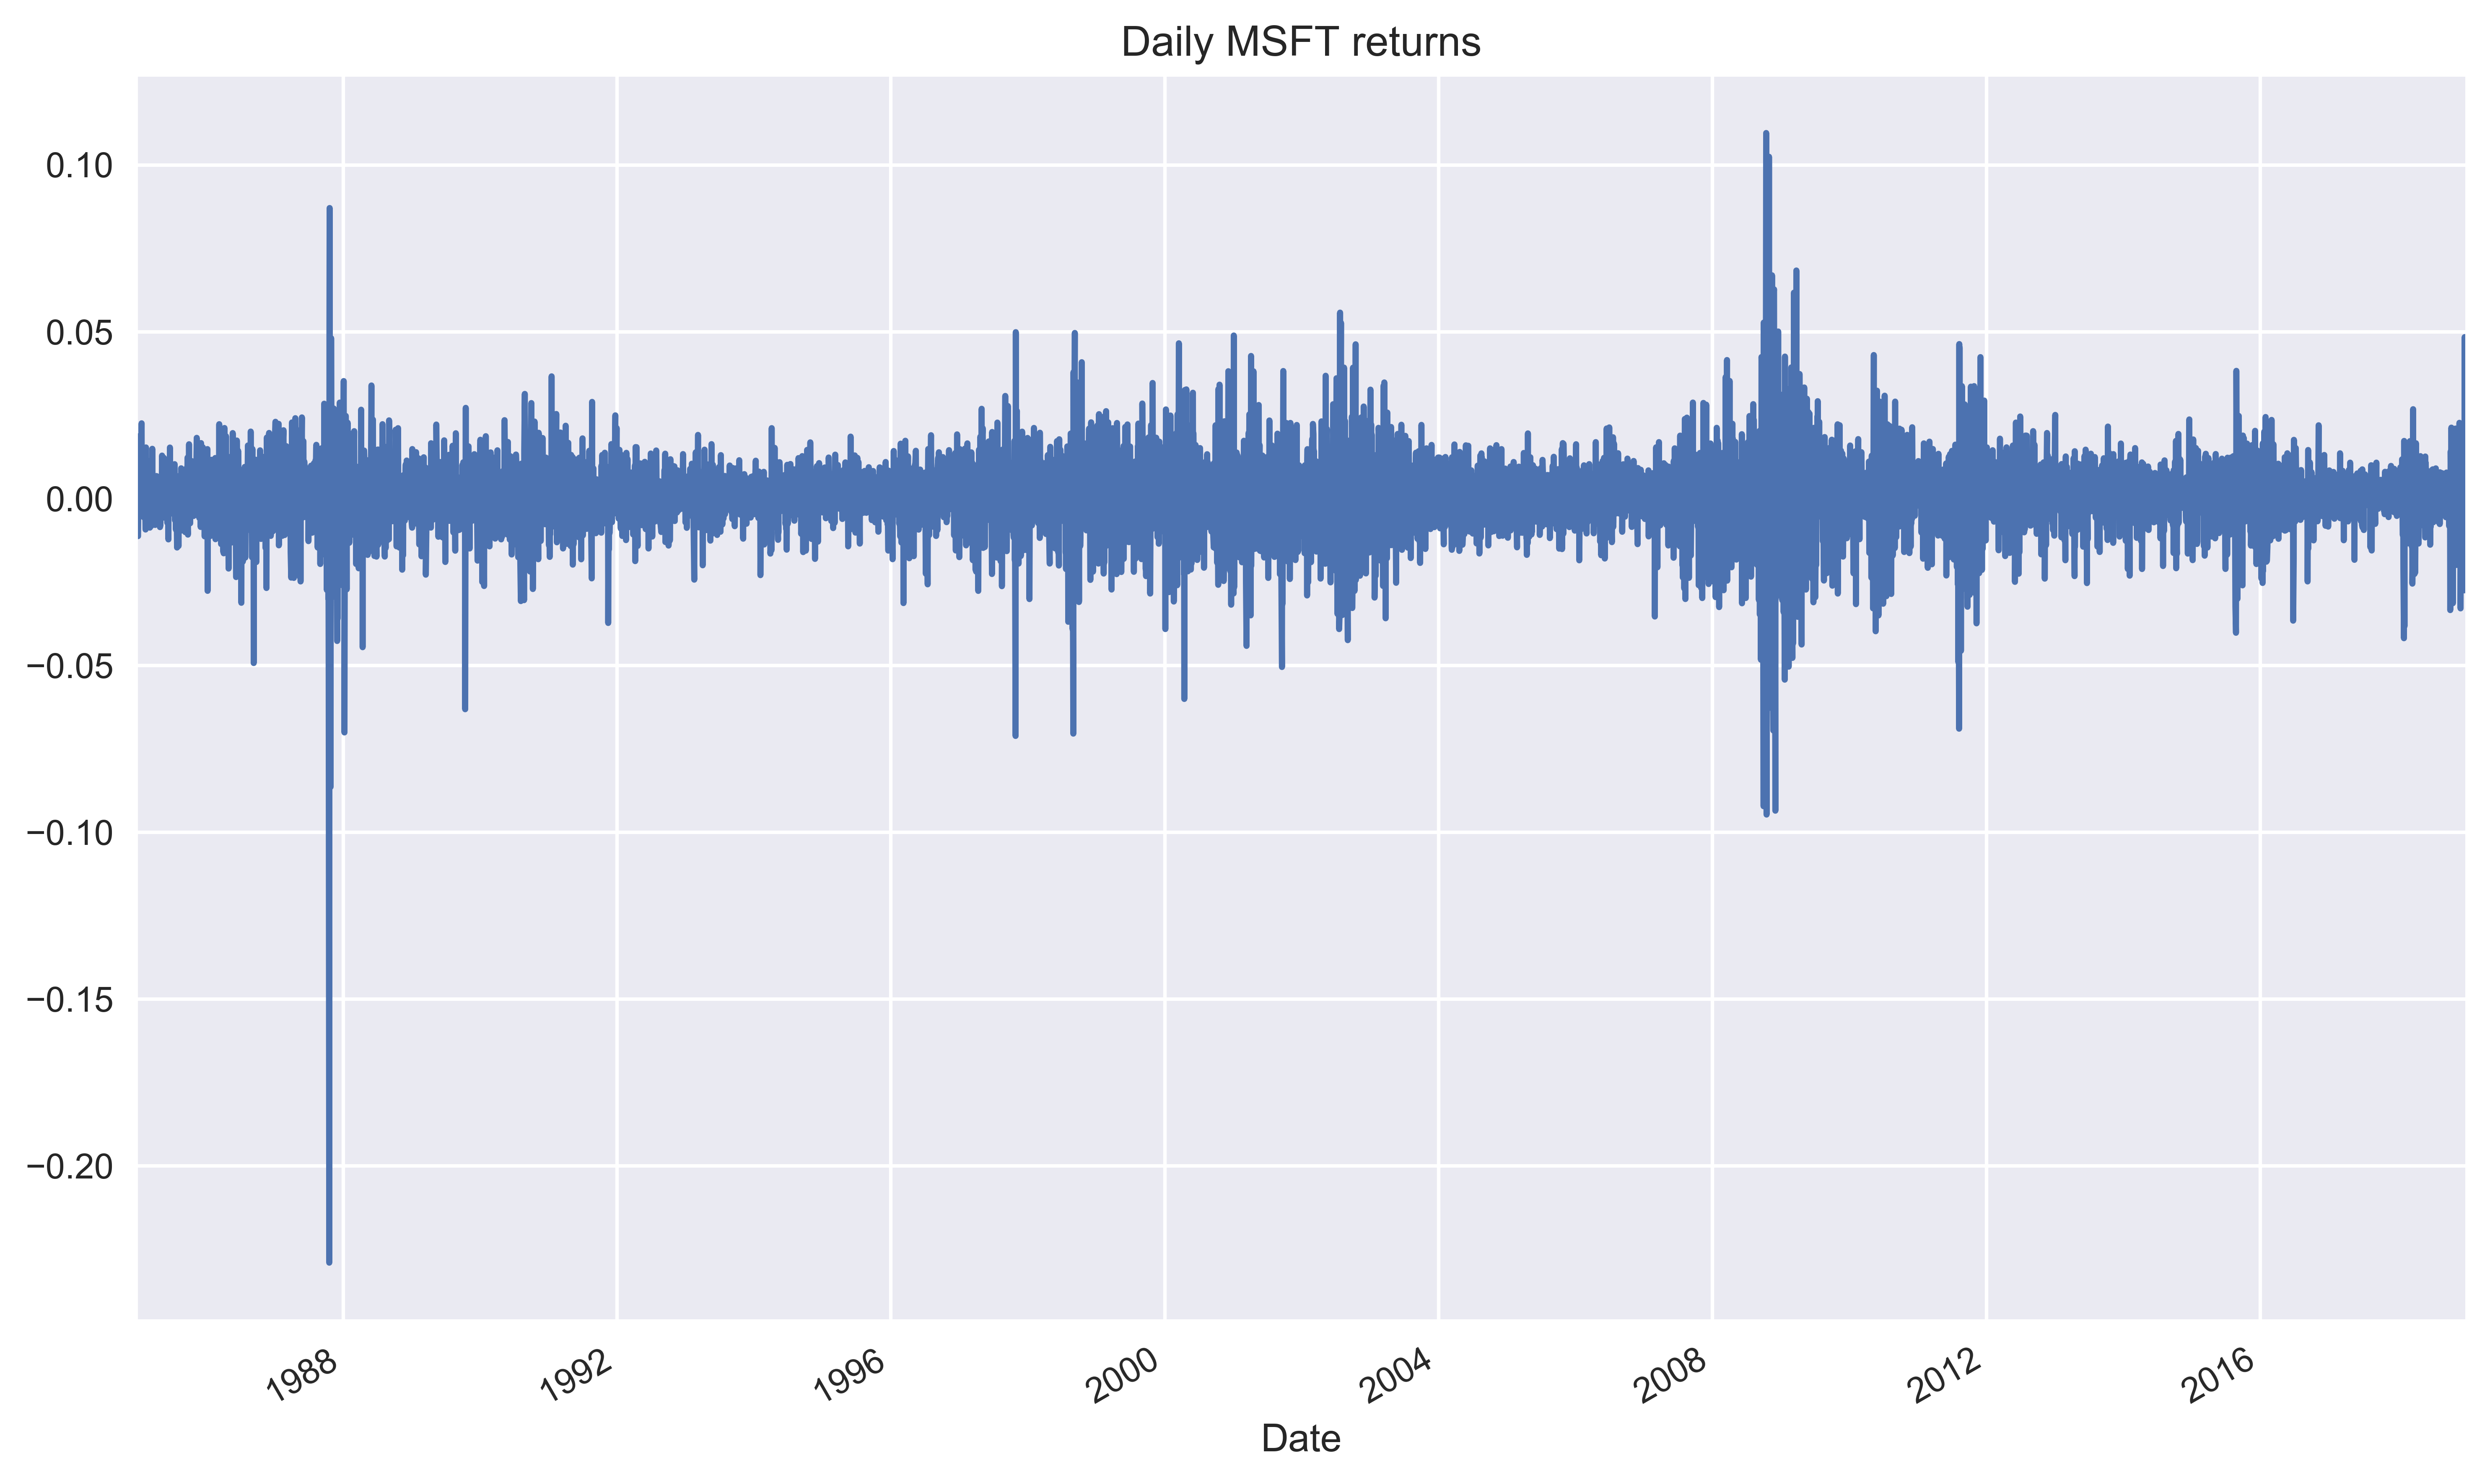

In [17]:
df.log_rtn.plot(title='Daily MSFT returns', figsize=(10, 6))

# plt.tight_layout()
# plt.savefig('images/ch1_im12.png')
plt.show()

#### Fact 3 - Absence of autocorrelation in returns

1. Define the parameters for creating the Autocorrelation plots:

In [16]:
N_LAGS = 50
SIGNIFICANCE_LEVEL = 0.05

2. Run the following code to create ACF plot of log returns:

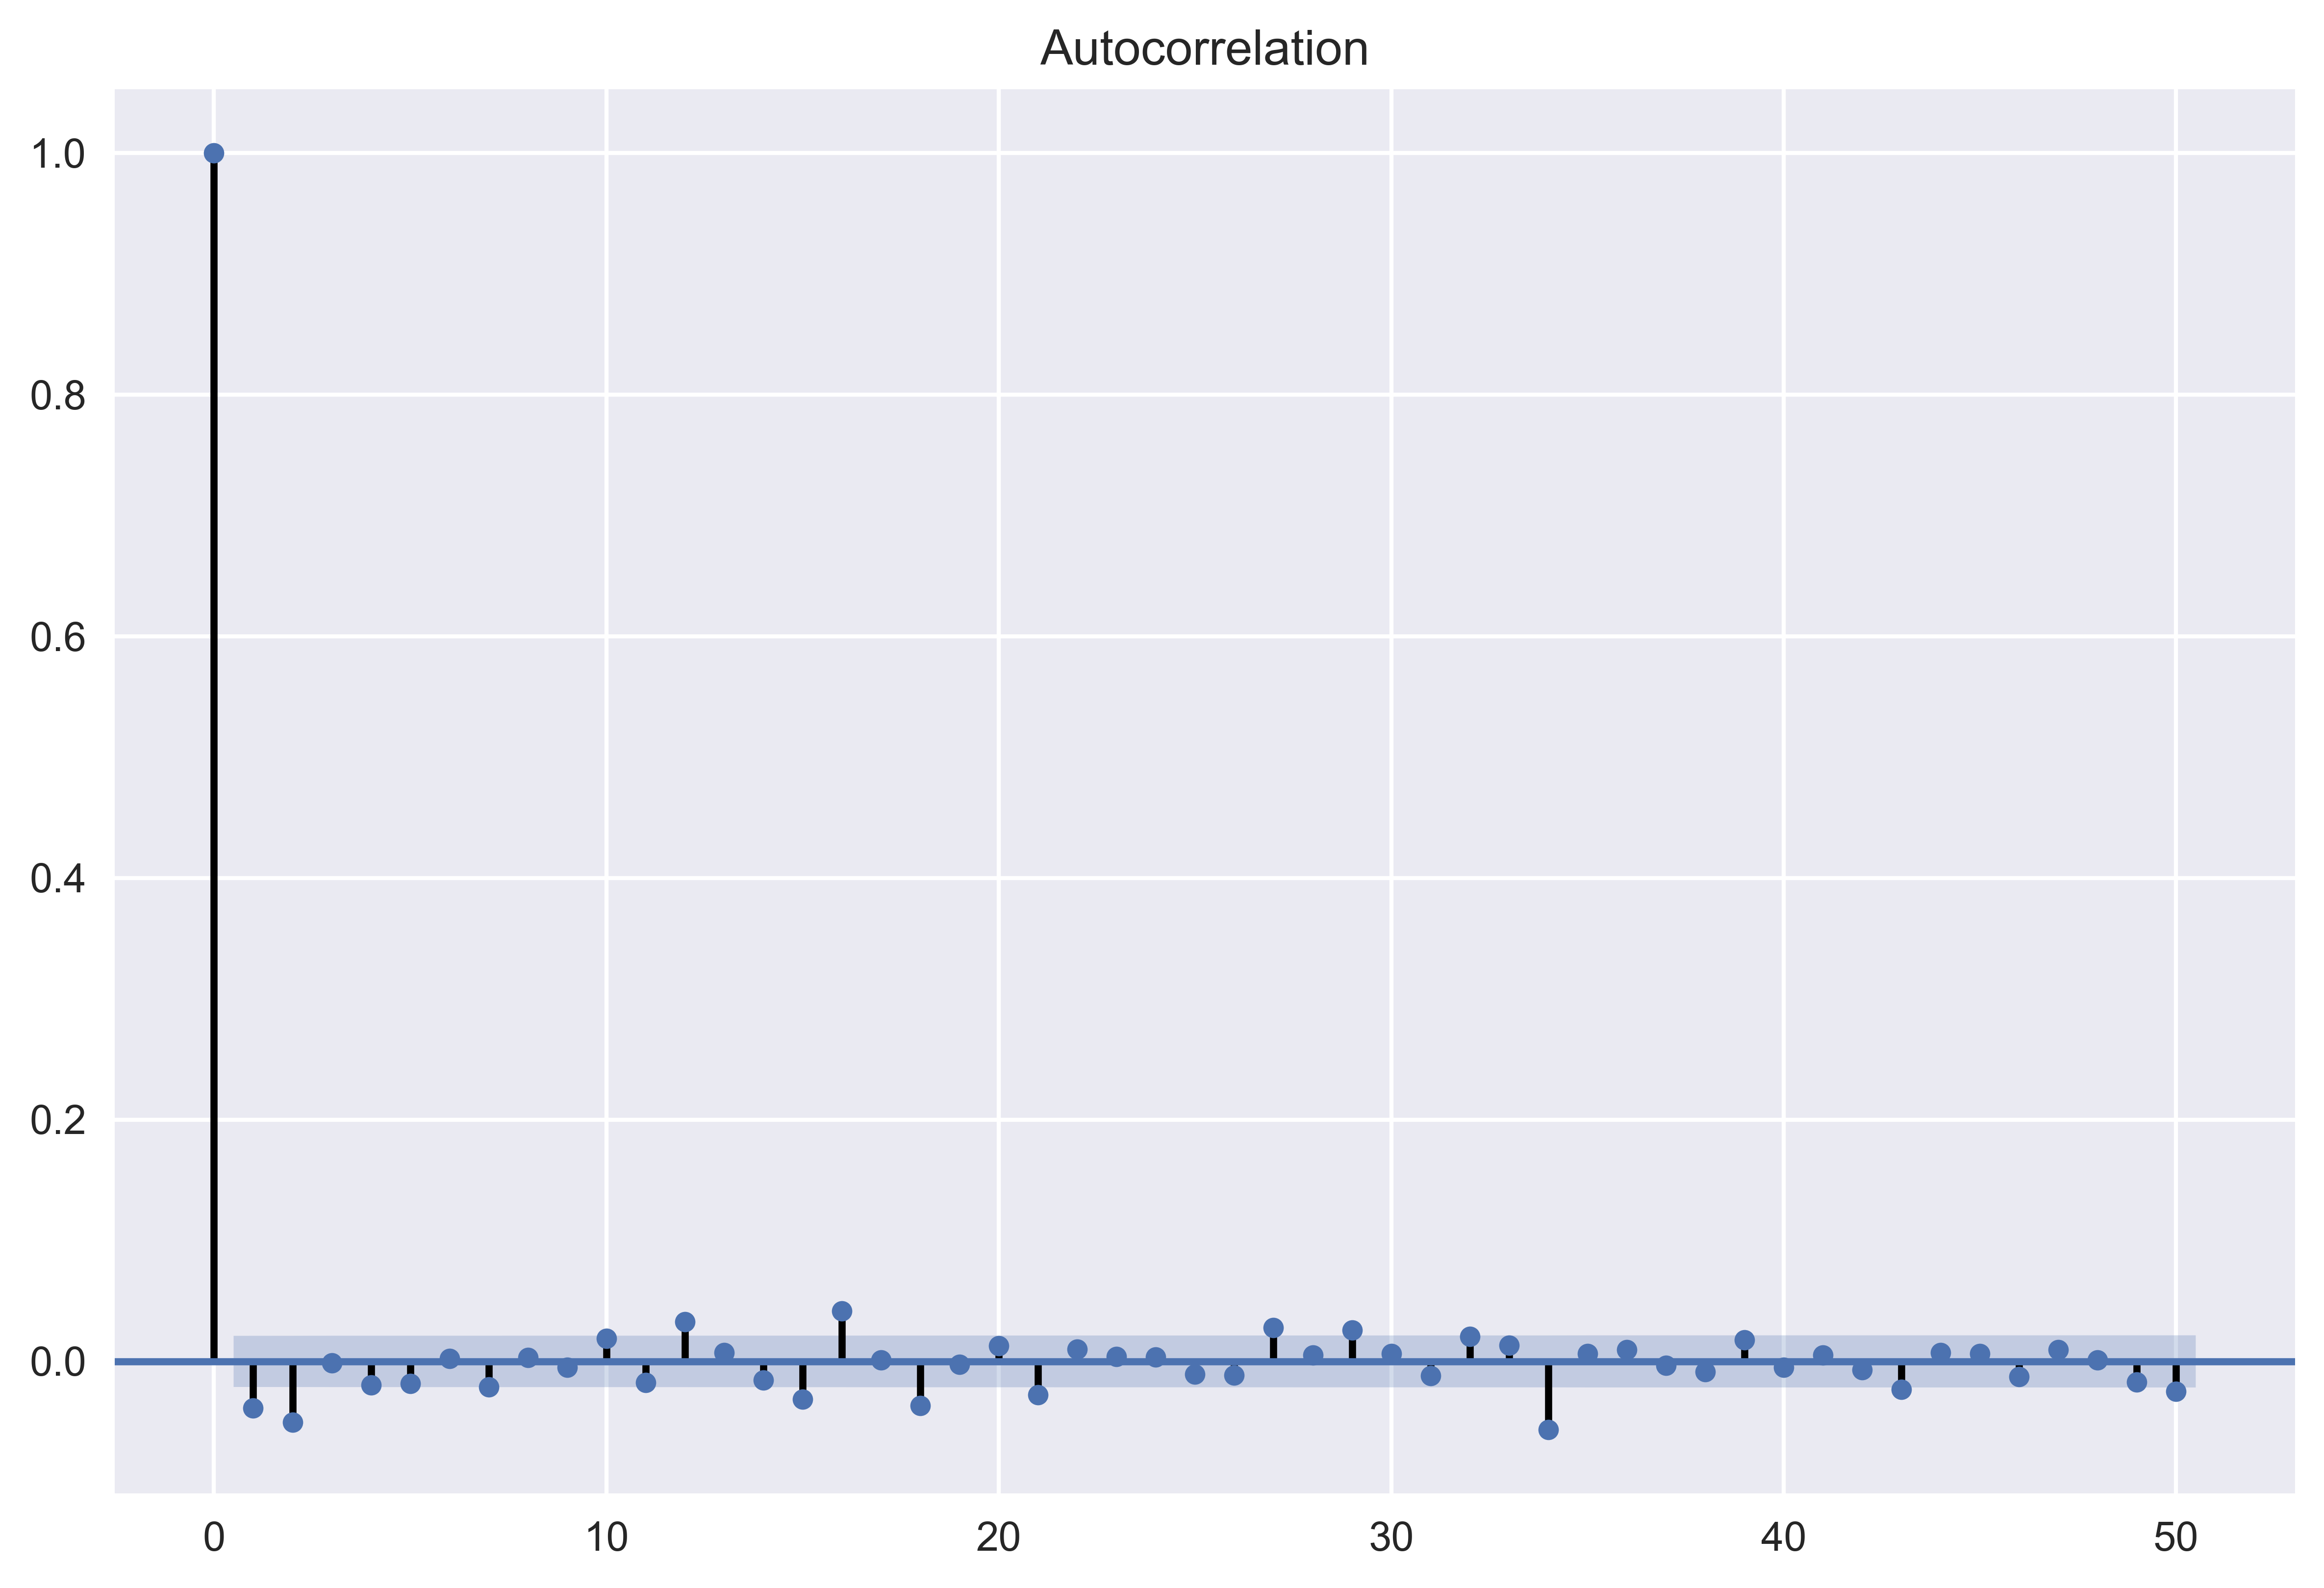

In [19]:
acf = smt.graphics.plot_acf(df.log_rtn, 
                            lags=N_LAGS, 
                            alpha=SIGNIFICANCE_LEVEL)

# plt.tight_layout()
# plt.savefig('images/ch1_im13.png')
plt.show()

#### Fact 4 - Small and decreasing autocorrelation in squared/absolute returns

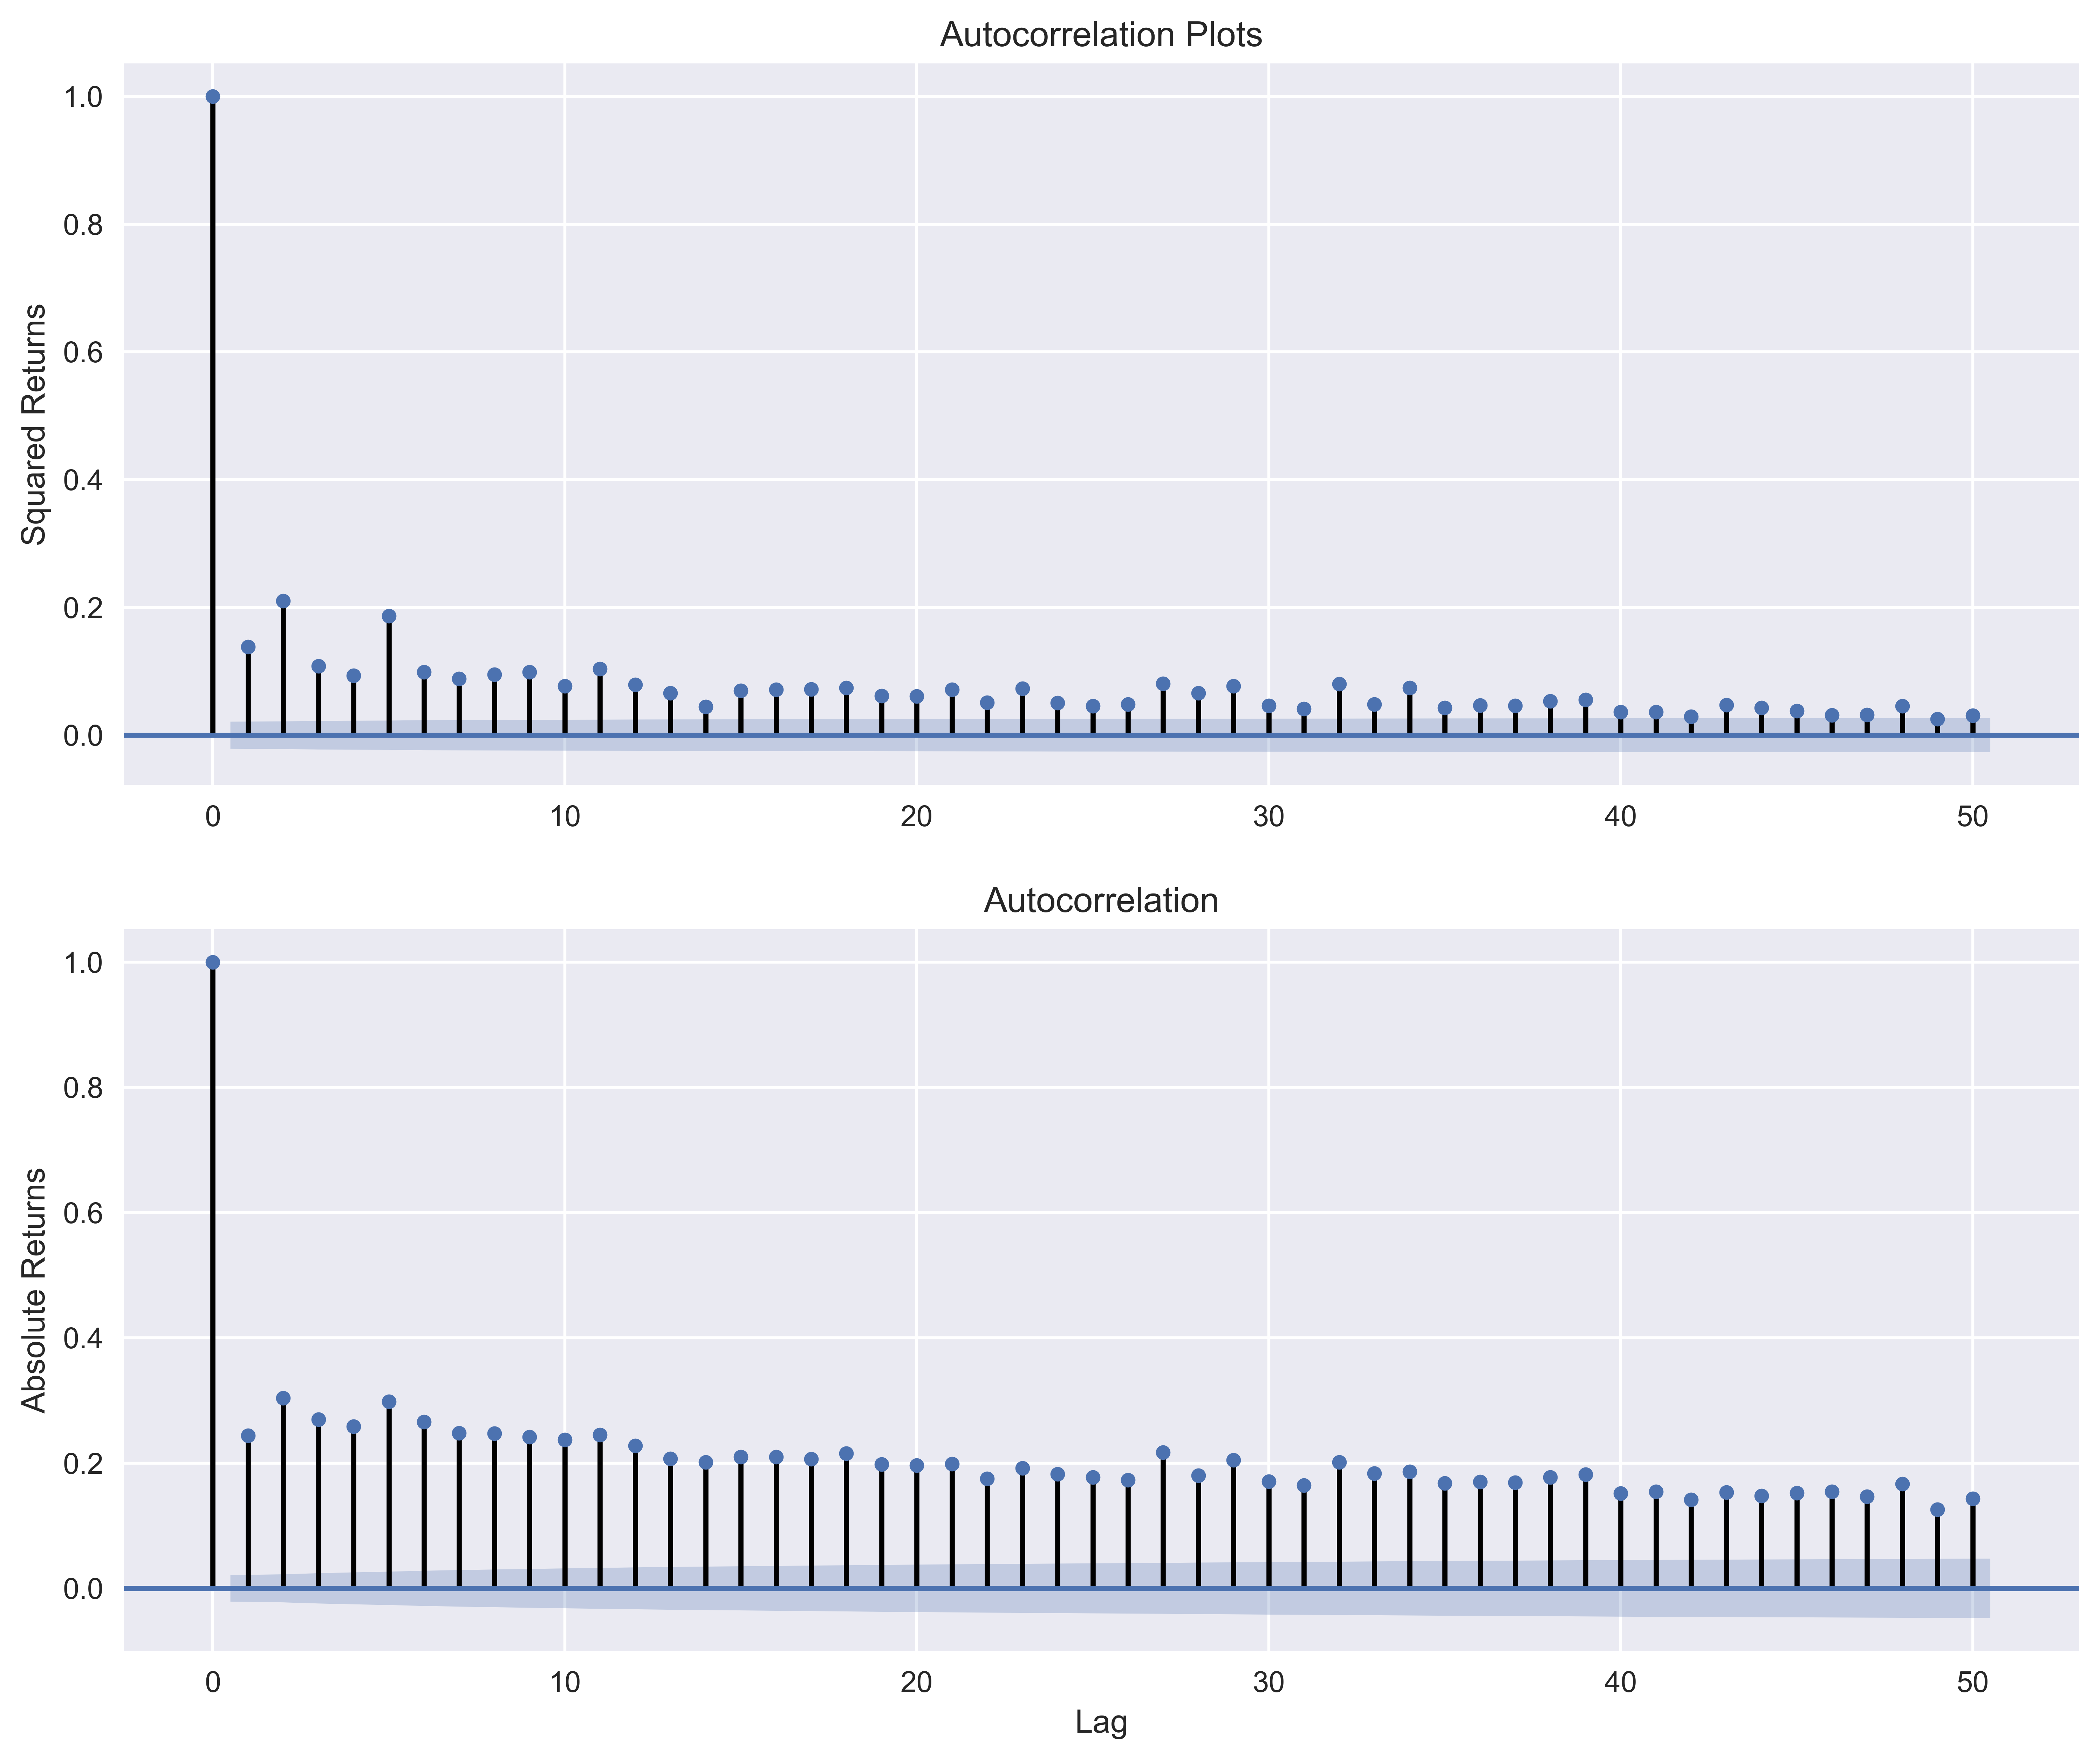

In [18]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

smt.graphics.plot_acf(df.log_rtn ** 2, lags=N_LAGS, 
                      alpha=SIGNIFICANCE_LEVEL, ax = ax[0])
ax[0].set(title='Autocorrelation Plots',
          ylabel='Squared Returns')

smt.graphics.plot_acf(np.abs(df.log_rtn), lags=N_LAGS, 
                      alpha=SIGNIFICANCE_LEVEL, ax = ax[1])
ax[1].set(ylabel='Absolute Returns',
          xlabel='Lag')

# plt.tight_layout()
# plt.savefig('images/ch1_im14.png')
plt.show()

#### Fact 5 - Leverage effect

1. Calculate volatility measures as moving standard deviations

In [21]:
df['moving_std_252'] = df[['log_rtn']].rolling(window=252).std()
df['moving_std_21'] = df[['log_rtn']].rolling(window=21).std()

2. Plot all the series:

In [23]:
fig, ax = plt.subplots(3, 1, figsize=(18, 15), 
                       sharex=True)

df.adj_close.plot(ax=ax[0])
ax[0].set(title='MSFT time series',
          ylabel='Stock price ($)')

df.log_rtn.plot(ax=ax[1])
ax[1].set(ylabel='Log returns (%)')

df.moving_std_252.plot(ax=ax[2], color='r', 
                       label='Moving Volatility 252d')
df.moving_std_21.plot(ax=ax[2], color='g', 
                      label='Moving Volatility 21d')
ax[2].set(ylabel='Moving Volatility',
          xlabel='Date')
ax[2].legend()

# plt.tight_layout()
# plt.savefig('images/ch1_im15.png')
plt.show()

### There's more

1. Download and preprocess the prices of S&P 500 and VIX:

In [24]:
df = yf.download(['^GSPC', '^VIX'], 
                 start='1985-01-01', 
                 end='2018-12-31',
                 progress=False)
df = df[['Adj Close']]
df.columns = df.columns.droplevel(0)
df = df.rename(columns={'^GSPC': 'sp500', '^VIX': 'vix'})

2. Calculate log returns:

In [25]:
df['log_rtn'] = np.log(df.sp500 / df.sp500.shift(1))
df['vol_rtn'] = np.log(df.vix / df.vix.shift(1))
df.dropna(how='any', axis=0, inplace=True)

3. Plot a scatterplot with the returns on the axes and fit a regression line to identify trend:

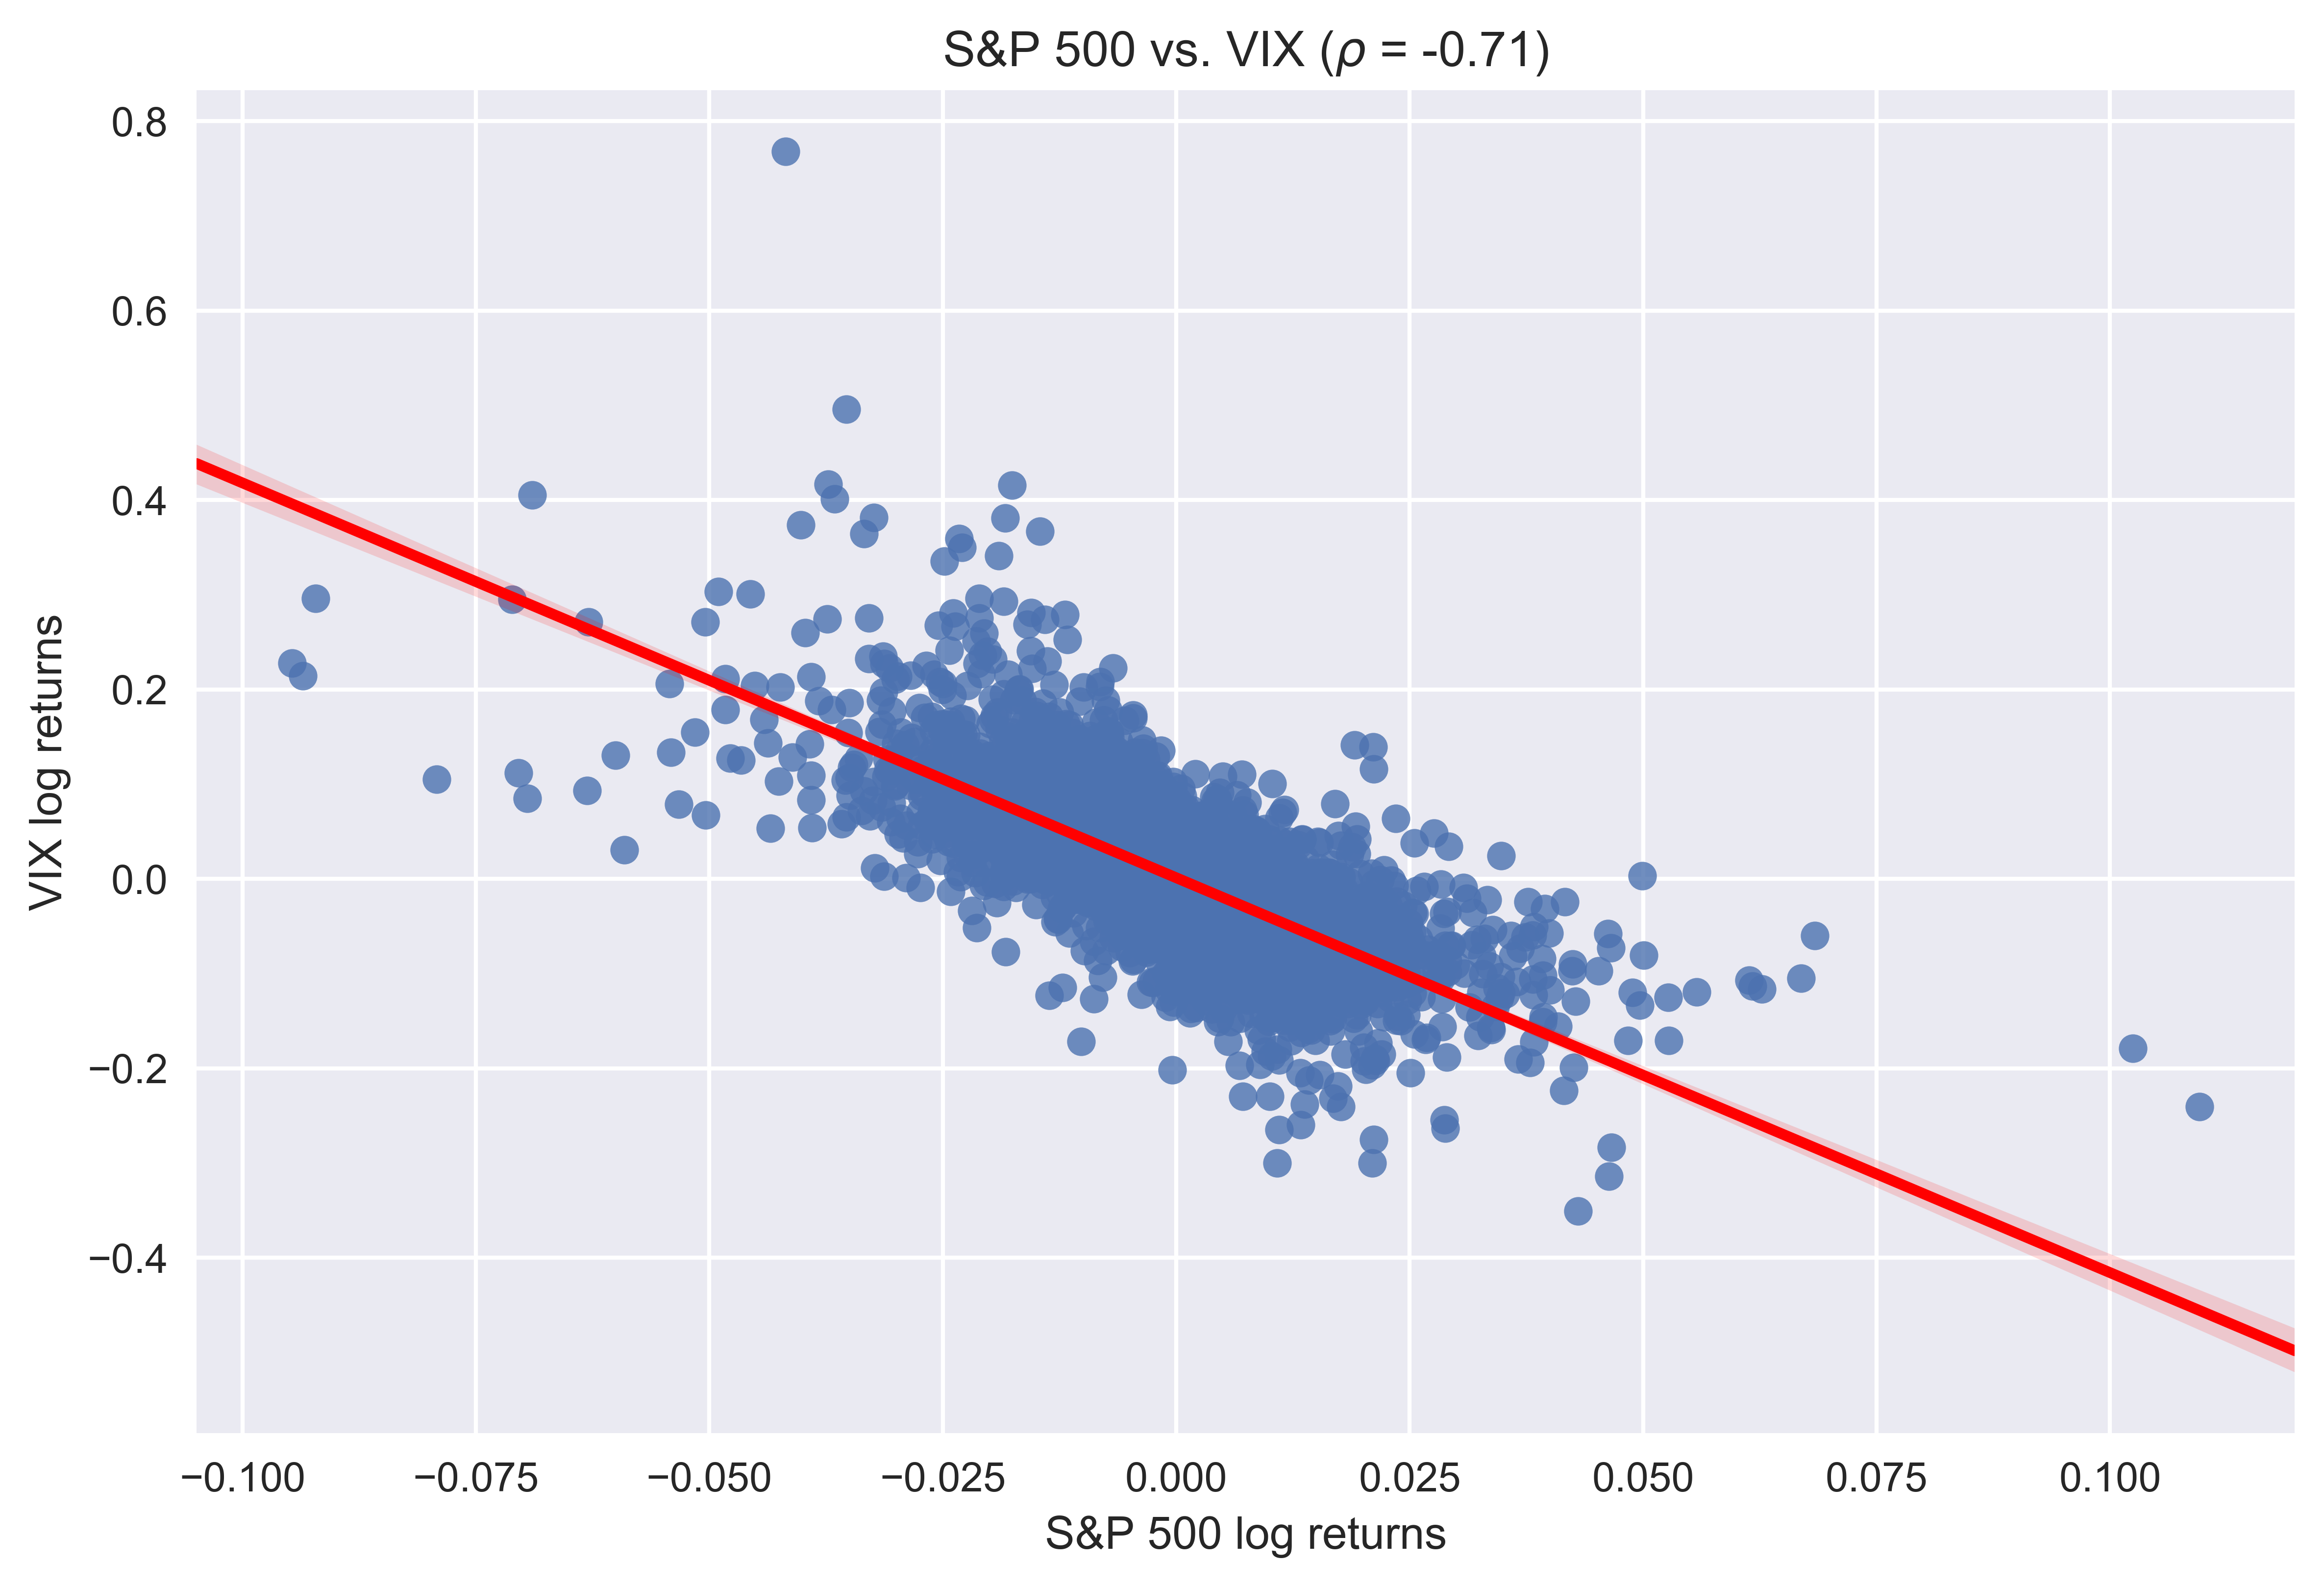

In [26]:
corr_coeff = df.log_rtn.corr(df.vol_rtn)

ax = sns.regplot(x='log_rtn', y='vol_rtn', data=df, 
                 line_kws={'color': 'red'})
ax.set(title=f'S&P 500 vs. VIX ($\\rho$ = {corr_coeff:.2f})',
       ylabel='VIX log returns',
       xlabel='S&P 500 log returns')

# plt.tight_layout()
# plt.savefig('images/ch1_im16.png')
plt.show()